<a href="https://colab.research.google.com/github/RafiPibe/KMeansClustering/blob/main/KMeansClustering_5025211074.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [9]:
data = pd.read_csv('/content/data.csv')
data.head(10)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
5,1,0.388680,0.415177,0.419134,0.590171,0.590251,0.998758,0.796903,0.808771,0.303116,...,0.710420,0.005278,0.622605,0.590172,0.829939,0.285087,0.026675,0.564538,1,0.019534
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,...,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
8,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,...,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,1,0.065826
9,0,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801


Standardize the continuous variable (Operating Gross Margin)

In [14]:
scaler = StandardScaler()
data[' Operating Gross Margin'] = scaler.fit_transform(data[[' Operating Gross Margin']])

Encoding Variables

In [15]:
data[' Realized Sales Gross Margin'] = data[' Realized Sales Gross Margin'].astype(int)
data[' Operating Profit Rate'] = data[' Operating Profit Rate'].astype(int)
data[' Pre-tax net Interest Rate'] = data[' Pre-tax net Interest Rate'].astype(int)
data[' After-tax net Interest Rate'] = data[' After-tax net Interest Rate'].astype(int)

Selecting Variables for clustering

In [16]:
X = data[[' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate']]

k-clustering with k = 20

In [58]:
k = 20
kmeans = KMeans(n_clusters=k, random_state=0)
data['cluster'] = kmeans.fit_predict(X)

In [59]:
# cluster result
cluster_centers = kmeans.cluster_centers_
data['cluster'].value_counts()


16    1073
1     1014
9      957
17     859
5      725
13     582
15     544
3      402
0      215
8      151
19     103
14      75
7       51
18      39
12      18
4        4
11       4
10       1
6        1
2        1
Name: cluster, dtype: int64

In [60]:
# Analizing and interpreting the clusters
for i in range(k):
    print(f"Cluster {i + 1}:")
    print(data[data['cluster'] == i].describe())



Cluster 1:
        Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  215.000000                                         215.000000          
mean     0.004651                                           0.551550          
std      0.068199                                           0.065382          
min      0.000000                                           0.359528          
25%      0.000000                                           0.510384          
50%      0.000000                                           0.548091          
75%      0.000000                                           0.593745          
max      1.000000                                           0.818018          

        ROA(A) before interest and % after tax  \
count                               215.000000   
mean                                  0.605947   
std                                   0.068829   
min                                   0.395007   
25%                        

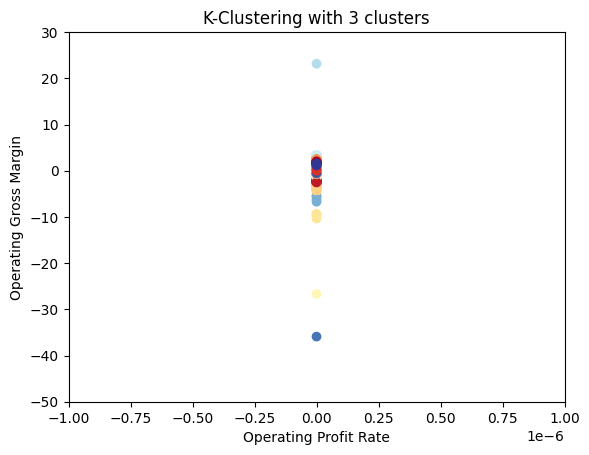

In [61]:
plt.scatter(data[' Operating Profit Rate'], data[' Operating Gross Margin'], c=data['cluster'], cmap='RdYlBu_r')
plt.xlabel('Operating Profit Rate')
plt.ylabel('Operating Gross Margin')
plt.title('K-Clustering with 3 clusters')

# Set the boundaries for the x and y axes
plt.xlim(-0.000001, 0.000001)
plt.ylim(-50, 30)

plt.show()


In [62]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

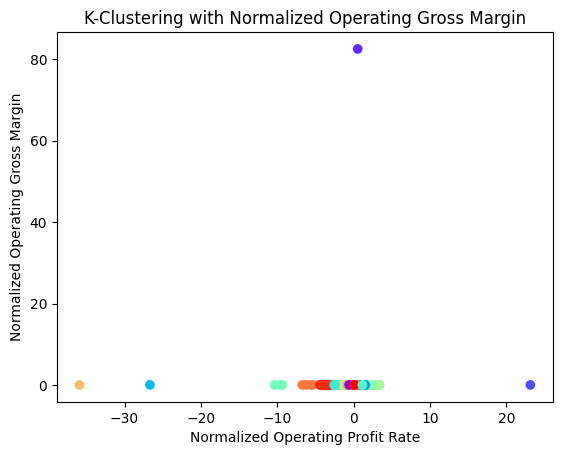

In [65]:
k = 20
kmeans = KMeans(n_clusters=k, random_state=0)
data['cluster'] = kmeans.fit_predict(X_normalized)

cluster_centers = kmeans.cluster_centers_
data['cluster'].value_counts()

plt.scatter(X_normalized[:, 0], X_normalized[:, 3], c=data['cluster'], cmap='rainbow')
plt.xlabel('Normalized Operating Profit Rate')
plt.ylabel('Normalized Operating Gross Margin')
plt.title('K-Clustering with Normalized Operating Gross Margin')
plt.show()